## Importing Packages

In [360]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import style
import urllib.request, urllib.parse
from urllib.error import HTTPError, URLError
from urllib.request import urlretrieve as retrieve
import json
import requests
from bs4 import BeautifulSoup
import pprint
import csv
import netCDF4
from pandasql import sqldf
import sqlite3
import datetime

## Uploading CSV File

In [4]:
coral = pd.read_csv(r"C:\Users\datre\OneDrive\Documents\Graduate School\Summer '20\Okazaki_2013.tab", sep = '\t', skiprows = 35)

In [5]:
coral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Treat                                                             142 non-null    object 
 1   Date                                                              142 non-null    object 
 2   Species                                                           142 non-null    object 
 3   ID (coral)                                                        142 non-null    object 
 4   Omega Arg (Calculated using CO2SYS)                               142 non-null    float64
 5   Calc rate CaCO3 [mmol/m**2/h] (Alkalinity anomaly technique ...)  140 non-null    float64
 6   SA [cm**2]                                                        139 non-null    float64
 7   Temp [°C]                          

In [6]:
coral

,Treat,Date,Species,ID (coral),Omega Arg (Calculated using CO2SYS),Calc rate CaCO3 [mmol/m**2/h] (Alkalinity anomaly technique ...),SA [cm**2],Temp [°C],Sal,PN [mmol/m**2/h],...,"pH (total scale, Potentiometric)",CSC flag (Calculated using seacarb afte...),CO2 [µmol/kg] (Calculated using seacarb afte...),pCO2water_SST_wet [µatm] (Calculated using seacarb afte...),fCO2water_SST_wet [µatm] (Calculated using seacarb afte...),[HCO3]- [µmol/kg] (Calculated using seacarb afte...),[CO3]2- [µmol/kg] (Calculated using seacarb afte...),DIC [µmol/kg] (Calculated using seacarb afte...),Omega Arg (Calculated using seacarb afte...),Omega Cal (Calculated using seacarb afte...)
0,ambient,2007-09-12,Siderastrea radians (coral),A1,3.94,5.51,73.2,29.80,33.520,14.575,...,8.072,8,8.97,353,352,1625,239,1873,3.92,5.87
1,ambient,2007-09-12,Siderastrea radians (coral),A10,4.12,5.55,45.9,30.32,33.390,15.710,...,8.089,8,8.48,337,336,1609,250,1867,4.11,6.16
2,ambient,2007-09-12,Siderastrea radians (coral),A13,4.12,6.50,30.3,30.32,33.390,25.255,...,8.089,8,8.48,337,336,1609,250,1867,4.11,6.16
3,ambient,2007-09-12,Siderastrea radians (coral),A5,3.94,4.51,61.4,29.85,33.520,15.620,...,8.072,8,8.96,353,352,1625,239,1872,3.93,5.88
4,ambient,2007-09-12,Solenastrea hyades (coral),S2,3.94,NaN,NaN,29.80,33.520,NaN,...,8.072,8,8.97,353,352,1625,239,1873,3.92,5.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,high CO2,2009-03-31,Siderastrea radians (coral),A23,3.32,3.89,42.6,26.41,37.343,10.770,...,7.951,8,14.10,522,520,1872,201,2086,3.15,4.74
138,high CO2,2009-03-31,Siderastrea radians (coral),A24,3.01,5.31,33.3,27.35,37.334,18.920,...,7.908,8,15.68,594,592,1919,193,2128,3.04,4.56
139,high CO2,2009-03-31,Siderastrea radians (coral),A25,2.76,7.84,20.5,27.35,37.334,32.760,...,7.863,8,17.68,670,668,1950,177,2145,2.78,4.18
140,high CO2,2009-03-31,Solenastrea hyades (coral),S21,2.88,5.71,176.5,26.41,37.343,12.920,...,7.886,8,16.49,611,609,1886,174,2076,2.73,4.11


For ease of understanding, a fahrenheit temperature column will be added. Additionally, column labels will be shortened for coding efficiency. As of now, the Treat column is categorical and considered an object, for analyses purposes, this column will be changed to binary category column.

## Changing Variables

In [7]:
temp_f = (coral["Temp [°C]"] * 9/5) + 32
temp_f

0      85.640
1      86.576
2      86.576
3      85.730
4      85.640
        ...  
137    79.538
138    81.230
139    81.230
140    79.538
141    79.538
Name: Temp [°C], Length: 142, dtype: float64

In [8]:
coral["Treat"].head(77)

0      ambient
1      ambient
2      ambient
3      ambient
4      ambient
        ...   
72     ambient
73     ambient
74     ambient
75    high CO2
76    high CO2
Name: Treat, Length: 77, dtype: object

The separation from ambient to high CO2 is at observation 75

In [9]:
coral["Treat"] = coral["Treat"].astype('category')
coral["Treat"] = coral["Treat"].cat.codes
coral.dtypes

Treat                                                                  int8
Date                                                                 object
Species                                                              object
ID (coral)                                                           object
Omega Arg (Calculated using CO2SYS)                                 float64
Calc rate CaCO3 [mmol/m**2/h] (Alkalinity anomaly technique ...)    float64
SA [cm**2]                                                          float64
Temp [°C]                                                           float64
Sal                                                                 float64
PN [mmol/m**2/h]                                                    float64
AT [µmol/kg] (Potentiometric titration)                             float64
pH (total scale, Potentiometric)                                    float64
CSC flag (Calculated using seacarb afte...)                           int64
CO2 [µmol/kg

## Cleaning DataFrame

In [219]:
treat = coral["Treat"]
date = coral["Date"]
species = coral["Species"]
c_temp_c = coral["Temp [°C]"]
c_sal = coral["Sal"]
calc_rate = coral["Calc rate CaCO3 [mmol/m**2/h] (Alkalinity anomaly technique ...)"]
pH = coral["pH (total scale, Potentiometric)"]
CO2 = coral["CO2 [µmol/kg] (Calculated using seacarb afte...)"]
c_pCO2 = coral["pCO2water_SST_wet [µatm] (Calculated using seacarb afte...)"]
HCO3 = coral["[HCO3]- [µmol/kg] (Calculated using seacarb afte...)"]

In [220]:
coral_clean = coral.rename(columns={"Treat":"treat", "Date":"date", "Species":"species", "Temp [°C]":"c_temp_c", "Sal":"c_sal", "Calc rate CaCO3 [mmol/m**2/h] (Alkalinity anomaly technique ...)":"calc_rate", "pH (total scale, Potentiometric)":"pH", "CO2 [µmol/kg] (Calculated using seacarb afte...)":"CO2", "pCO2water_SST_wet [µatm] (Calculated using seacarb afte...)":"c_pCO2", "[HCO3]- [µmol/kg] (Calculated using seacarb afte...)":"HCO3"})
del coral_clean["ID (coral)"]
del coral_clean["Omega Arg (Calculated using CO2SYS)"]
del coral_clean["SA [cm**2]"]
del coral_clean["PN [mmol/m**2/h]"]
del coral_clean["AT [µmol/kg] (Potentiometric titration)"]
del coral_clean["CSC flag (Calculated using seacarb afte...)"]
del coral_clean["fCO2water_SST_wet [µatm] (Calculated using seacarb afte...)"]
del coral_clean["[CO3]2- [µmol/kg] (Calculated using seacarb afte...)"]
del coral_clean["DIC [µmol/kg] (Calculated using seacarb afte...)"]
del coral_clean["Omega Arg (Calculated using seacarb afte...)"]
del coral_clean["Omega Cal (Calculated using seacarb afte...)"]
coral_clean["temp_f"] = temp_f
coral_clean.head()

,treat,date,species,calc_rate,c_temp_c,c_sal,pH,CO2,c_pCO2,HCO3,temp_f
0,0,2007-09-12,Siderastrea radians (coral),5.51,29.80,33.52,8.072,8.97,353,1625,85.640
1,0,2007-09-12,Siderastrea radians (coral),5.55,30.32,33.39,8.089,8.48,337,1609,86.576
2,0,2007-09-12,Siderastrea radians (coral),6.50,30.32,33.39,8.089,8.48,337,1609,86.576
3,0,2007-09-12,Siderastrea radians (coral),4.51,29.85,33.52,8.072,8.96,353,1625,85.730
4,0,2007-09-12,Solenastrea hyades (coral),NaN,29.80,33.52,8.072,8.97,353,1625,85.640


Variables not being used were removed from this data set and the fahrenheit column was added. 

## Finding Null Values

In [221]:
coral_clean.isnull().sum()

treat        0
date         0
species      0
calc_rate    2
c_temp_c     0
c_sal        0
pH           0
CO2          0
c_pCO2       0
HCO3         0
temp_f       0
dtype: int64

In [222]:
coral_clean = coral_clean.dropna()
coral_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 141
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   treat      140 non-null    int8   
 1   date       140 non-null    object 
 2   species    140 non-null    object 
 3   calc_rate  140 non-null    float64
 4   c_temp_c   140 non-null    float64
 5   c_sal      140 non-null    float64
 6   pH         140 non-null    float64
 7   CO2        140 non-null    float64
 8   c_pCO2     140 non-null    int64  
 9   HCO3       140 non-null    int64  
 10  temp_f     140 non-null    float64
dtypes: float64(6), int64(2), int8(1), object(2)
memory usage: 12.2+ KB


In [223]:
coral_clean.isnull().sum()

treat        0
date         0
species      0
calc_rate    0
c_temp_c     0
c_sal        0
pH           0
CO2          0
c_pCO2       0
HCO3         0
temp_f       0
dtype: int64

There were two null values in the calcification rate column. Since there is no way to easily estimate this value at this time, those two observations were removed.

## Finding Duplicates

In [224]:
coral_clean[coral_clean.duplicated()]

,treat,date,species,calc_rate,c_temp_c,c_sal,pH,CO2,c_pCO2,HCO3,temp_f


There are no duplicate observations in this data.

In [289]:
coral_clean.describe()

,treat,calc_rate,c_temp_c,c_sal,pH,CO2,c_pCO2,HCO3,temp_f
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,0.471429,3.369429,25.595214,37.836936,8.063350,11.195714,403.064286,1786.985714,78.071386
std,0.500975,3.802478,3.448075,4.015516,0.120336,4.639009,159.002249,244.015950,6.206536
min,0.000000,-25.620000,20.020000,32.244000,7.521000,5.640000,212.000000,1403.000000,68.036000
25%,0.000000,1.535000,23.130000,35.378000,8.002000,8.470000,323.500000,1546.000000,73.634000
50%,0.000000,3.020000,25.630000,37.343000,8.082000,10.860000,369.500000,1820.000000,78.134000
75%,1.000000,5.315000,28.880000,39.050000,8.137000,12.680000,458.500000,2018.500000,83.984000
max,1.000000,14.060000,30.750000,47.246000,8.264000,44.190000,1520.000000,2229.000000,87.350000


In [314]:
iqr = 458.5-323.5
lb = 323.5 -(1.5 * iqr) 
ub = 458.5 +(1.5 * iqr)
lb,ub

(121.0, 661.0)

In [315]:
coral_clean.c_pCO2 = coral_clean.c_pCO2[(coral_clean['c_pCO2'] >= 121) & (coral_clean['c_pCO2'] <= 661)]

In [316]:
iqr2 = 5.315-1.535
lb2 = 1.535 -(1.5 * iqr2) 
ub2 = 5.315 +(1.5 * iqr2)
lb2,ub2

(-4.135, 10.985)

In [317]:
coral_clean.calc_rate = coral_clean.calc_rate[(coral_clean['calc_rate'] >= (-4.135)) & (coral_clean['calc_rate'] <= 10.985)]

# Wedsite Data

In [22]:
URL = "https://data.nodc.noaa.gov/ncei/ocads/data/0109904/"
filetype = ".csv"

In [23]:
r = requests.get("https://data.nodc.noaa.gov/ncei/ocads/data/0109904/")
print(r.text[0:500])

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">
<html>
 <head>
  <title>Index of /ncei/ocads/data/0109904</title>
 </head>
 <body>
<h1>Index of /ncei/ocads/data/0109904</h1>
<table><tr><th><img src="/icons/blank.gif" alt="[ICO]"></th><th><a href="?C=N;O=D">Name</a></th><th><a href="?C=M;O=A">Last modified</a></th><th><a href="?C=S;O=A">Size</a></th><th><a href="?C=D;O=A">Description</a></th></tr><tr><th colspan="5"><hr></th></tr>
<tr><td valign="top"><img src="/icons/back.gif" alt="[DIR]


In [24]:
soup = BeautifulSoup(r.text, "html.parser")

## Finding All Data Files

In [25]:
for link in soup.find_all("a"):
    files = link.get("href")
    if filetype in files:
        print(files)

GraysRf_81W_31N_Aug2016_Jun2017.csv
GraysRf_81W_31N_Aug2016_Jun2017_QFLog.csv
GraysRf_81W_31N_Aug2017_Aug2018.csv
GraysRf_81W_31N_Aug2017_Aug2018_QFLog.csv
GraysRf_81W_31N_Jan2013_Oct2013.csv
GraysRf_81W_31N_Jan2013_Oct2013_QFLog.csv
GraysRf_81W_31N_Jul2006_Jun2007.csv
GraysRf_81W_31N_Jul2006_Jun2007_QF_Log.csv
GraysRf_81W_31N_Jul2009_May2010.csv
GraysRf_81W_31N_Jun2007_Jun2008.csv
GraysRf_81W_31N_Jun2008_May2009.csv
GraysRf_81W_31N_Jun2008_May2009_QF_Log.csv
GraysRf_81W_31N_Jun2017_Jul2017.csv
GraysRf_81W_31N_Jun2017_Jul2017_QFLog.csv
GraysRf_81W_31N_May2010_Sep2010.csv
GraysRf_81W_31N_May2010_Sep2010_.csv
GraysRf_81W_31N_May2010_Sep2010_QFLog.csv
GraysRf_81W_31N_Oct2013_Oct2014.csv
GraysRf_81W_31N_Oct2013_Oct2014_QFLog.csv
GraysRf_81W_31N_Oct2014_Oct2015.csv
GraysRf_81W_31N_Oct2014_Oct2015_QFLog.csv
GraysRf_81W_31N_Sep2010_Sep2011.csv
GraysRf_81W_31N_Sep2010_Sep2011_QFLog.csv
GraysRf_81W_31N_Sep2011_Sep2012.csv
GraysRf_81W_31N_Sep2011_Sep2012_QFLog.csv
GraysRf_81W_31N_Sep2012_Jan2013

In [26]:
retrieve(URL, "GraysRf_81W_31N_Jun2007_Jun2008.csv")

('GraysRf_81W_31N_Jun2007_Jun2008.csv',
 <http.client.HTTPMessage at 0x194d35d6548>)

### Files of Interest

In [27]:
retrieve(URL, "GraysRf_81W_31N_Jun2007_Jun2008.csv")

('GraysRf_81W_31N_Jun2007_Jun2008.csv',
 <http.client.HTTPMessage at 0x194d35d6ec8>)

In [28]:
retrieve(URL, "GraysRf_81W_31N_Jun2008_May2009.csv")

('GraysRf_81W_31N_Jun2008_May2009.csv',
 <http.client.HTTPMessage at 0x194d35e58c8>)

## Opening Files

In [41]:
gray1 = pd.read_csv(r"C:\Users\datre\OneDrive\Documents\Graduate School\Summer '20\GraysRf_81W_31N_Jun2007_Jun2008.csv", skiprows = 4)
gray2 = pd.read_csv(r"C:\Users\datre\OneDrive\Documents\Graduate School\Summer '20\GraysRf_81W_31N_Jun2008_May2009.csv", skiprows = 4)

In [42]:
gray1.head()

,Mooring Name,Latitude,Longitude,Date,Time,xCO2 SW (wet) (umol/mol),CO2 SW QF,H2O SW (mmol/mol),xCO2 Air (wet) (umol/mol),CO2 Air QF,...,SST (C),Salinity,xCO2 SW (dry) (umol/mol),xCO2 Air (dry) (umol/mol),fCO2 SW (sat) uatm,fCO2 Air (sat) uatm,dfCO2,pCO2 SW (sat) uatm,pCO2 Air (sat) uatm,dpCO2
0,GraysReef_81W_31N,31.4,-80.87,6/26/2007,21:13:00,396.5,2,12.77,377.6,2,...,27.890,34.854,401.6,382.7,389.7,371.4,18.3,390.9,372.5,18.4
1,GraysReef_81W_31N,31.4,-80.87,6/26/2007,21:43:00,396.3,2,12.79,377.8,2,...,27.832,34.868,401.5,383.0,389.5,371.6,17.9,390.7,372.7,18.0
2,GraysReef_81W_31N,31.4,-80.87,6/26/2007,22:13:00,390.8,2,13.40,377.8,2,...,27.690,34.854,396.1,383.0,384.4,371.7,12.7,385.6,372.8,12.8
3,GraysReef_81W_31N,31.4,-80.87,6/26/2007,22:43:00,398.1,2,13.44,378.1,2,...,27.797,34.890,403.5,383.3,391.5,371.9,19.6,392.7,373.0,19.7
4,GraysReef_81W_31N,31.4,-80.87,6/26/2007,23:13:00,398.1,2,14.02,378.3,2,...,27.755,34.903,403.8,383.7,391.7,372.3,19.5,393.0,373.4,19.6


In [43]:
gray2.head()

,Mooring Name,Latitude,Longitude,Date,Time,xCO2 SW (wet) (umol/mol),CO2 SW QF,H2O SW (mmol/mol),xCO2 Air (wet) (umol/mol),CO2 Air QF,...,SST (C),Salinity,xCO2 SW (dry) (umol/mol),xCO2 Air (dry) (umol/mol),fCO2 SW (sat) uatm,fCO2 Air (sat) uatm,dfCO2,pCO2 SW (sat) uatm,pCO2 Air (sat) uatm,dpCO2
0,GraysRf_81W_31N,31.4,-80.87,6/16/2008,18:19:00,460.9,2,17.90,393.2,2,...,-999.0,-999.0,469.3,398.8,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
1,GraysRf_81W_31N,31.4,-80.87,6/16/2008,18:49:00,467.2,2,17.86,389.8,2,...,-999.0,-999.0,475.7,395.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2,GraysRf_81W_31N,31.4,-80.87,6/16/2008,18:49:00,467.2,2,17.86,389.8,2,...,-999.0,-999.0,475.7,395.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
3,GraysRf_81W_31N,31.4,-80.87,6/16/2008,19:19:00,464.1,2,18.35,386.5,2,...,-999.0,-999.0,472.8,391.4,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
4,GraysRf_81W_31N,31.4,-80.87,6/16/2008,19:19:00,464.1,2,18.35,386.5,2,...,-999.0,-999.0,472.8,391.4,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0


In [44]:
gray = pd.merge(gray1, gray2, how = "outer")
gray

,Mooring Name,Latitude,Longitude,Date,Time,xCO2 SW (wet) (umol/mol),CO2 SW QF,H2O SW (mmol/mol),xCO2 Air (wet) (umol/mol),CO2 Air QF,...,SST (C),Salinity,xCO2 SW (dry) (umol/mol),xCO2 Air (dry) (umol/mol),fCO2 SW (sat) uatm,fCO2 Air (sat) uatm,dfCO2,pCO2 SW (sat) uatm,pCO2 Air (sat) uatm,dpCO2
0,GraysReef_81W_31N,31.4,-80.87,6/26/2007,21:13:00,396.5,2,12.77,377.6,2,...,27.890,34.854,401.6,382.7,389.7,371.4,18.3,390.9,372.5,18.4
1,GraysReef_81W_31N,31.4,-80.87,6/26/2007,21:43:00,396.3,2,12.79,377.8,2,...,27.832,34.868,401.5,383.0,389.5,371.6,17.9,390.7,372.7,18.0
2,GraysReef_81W_31N,31.4,-80.87,6/26/2007,22:13:00,390.8,2,13.40,377.8,2,...,27.690,34.854,396.1,383.0,384.4,371.7,12.7,385.6,372.8,12.8
3,GraysReef_81W_31N,31.4,-80.87,6/26/2007,22:43:00,398.1,2,13.44,378.1,2,...,27.797,34.890,403.5,383.3,391.5,371.9,19.6,392.7,373.0,19.7
4,GraysReef_81W_31N,31.4,-80.87,6/26/2007,23:13:00,398.1,2,14.02,378.3,2,...,27.755,34.903,403.8,383.7,391.7,372.3,19.5,393.0,373.4,19.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5829,GraysRf_81W_31N,31.4,-80.87,5/17/2009,21:17:00,470.5,2,13.33,387.6,2,...,25.097,36.019,476.9,392.4,461.3,379.5,81.8,462.8,380.8,82.0
5830,GraysRf_81W_31N,31.4,-80.87,5/18/2009,0:17:00,472.9,2,13.85,388.3,2,...,25.444,35.438,479.6,392.9,463.8,380.0,83.8,465.3,381.2,84.1
5831,GraysRf_81W_31N,31.4,-80.87,5/18/2009,3:17:00,487.3,2,14.36,397.7,2,...,25.221,35.241,494.4,403.1,478.6,390.2,88.4,480.1,391.4,88.7
5832,GraysRf_81W_31N,31.4,-80.87,5/18/2009,6:17:00,475.4,2,12.11,387.7,2,...,25.183,35.392,481.2,392.1,465.3,379.1,86.2,466.7,380.3,86.4


In [45]:
gray.isnull().sum()

Mooring Name                  0
Latitude                      0
Longitude                     0
Date                          0
Time                          0
xCO2  SW (wet) (umol/mol)     0
CO2 SW QF                     0
H2O SW (mmol/mol)             0
xCO2  Air (wet) (umol/mol)    0
CO2 Air QF                    0
H2O Air (mmol/mol)            0
Licor Atm Pressure  (hPa)     0
Licor Temp (C)                0
MAPCO2 %O2                    0
SST (C)                       0
Salinity                      0
xCO2  SW (dry) (umol/mol)     0
xCO2  Air (dry) (umol/mol)    0
fCO2  SW (sat) uatm           0
fCO2  Air (sat) uatm          0
dfCO2                         0
pCO2 SW (sat) uatm            0
pCO2 Air (sat) uatm           0
dpCO2                         0
dtype: int64

In [46]:
gray[gray.duplicated()]

,Mooring Name,Latitude,Longitude,Date,Time,xCO2 SW (wet) (umol/mol),CO2 SW QF,H2O SW (mmol/mol),xCO2 Air (wet) (umol/mol),CO2 Air QF,...,SST (C),Salinity,xCO2 SW (dry) (umol/mol),xCO2 Air (dry) (umol/mol),fCO2 SW (sat) uatm,fCO2 Air (sat) uatm,dfCO2,pCO2 SW (sat) uatm,pCO2 Air (sat) uatm,dpCO2
2986,GraysRf_81W_31N,31.4,-80.87,6/16/2008,18:49:00,467.2,2,17.86,389.8,2,...,-999.0,-999.0,475.7,395.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2988,GraysRf_81W_31N,31.4,-80.87,6/16/2008,19:19:00,464.1,2,18.35,386.5,2,...,-999.0,-999.0,472.8,391.4,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2990,GraysRf_81W_31N,31.4,-80.87,6/16/2008,19:49:00,460.5,2,18.75,389.5,2,...,-999.0,-999.0,469.3,395.1,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2992,GraysRf_81W_31N,31.4,-80.87,6/16/2008,20:19:00,462.3,2,18.93,390.2,2,...,-999.0,-999.0,471.2,395.9,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2994,GraysRf_81W_31N,31.4,-80.87,6/16/2008,20:49:00,458.9,2,18.87,391.3,2,...,-999.0,-999.0,467.7,397.3,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2996,GraysRf_81W_31N,31.4,-80.87,6/16/2008,21:19:00,458.3,2,19.81,391.8,2,...,-999.0,-999.0,467.6,398.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2998,GraysRf_81W_31N,31.4,-80.87,6/16/2008,21:49:00,458.7,2,18.65,390.2,2,...,-999.0,-999.0,467.4,396.4,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0


In [47]:
gray.duplicated().sum()

7

In [48]:
gray.drop_duplicates(keep = "first")

,Mooring Name,Latitude,Longitude,Date,Time,xCO2 SW (wet) (umol/mol),CO2 SW QF,H2O SW (mmol/mol),xCO2 Air (wet) (umol/mol),CO2 Air QF,...,SST (C),Salinity,xCO2 SW (dry) (umol/mol),xCO2 Air (dry) (umol/mol),fCO2 SW (sat) uatm,fCO2 Air (sat) uatm,dfCO2,pCO2 SW (sat) uatm,pCO2 Air (sat) uatm,dpCO2
0,GraysReef_81W_31N,31.4,-80.87,6/26/2007,21:13:00,396.5,2,12.77,377.6,2,...,27.890,34.854,401.6,382.7,389.7,371.4,18.3,390.9,372.5,18.4
1,GraysReef_81W_31N,31.4,-80.87,6/26/2007,21:43:00,396.3,2,12.79,377.8,2,...,27.832,34.868,401.5,383.0,389.5,371.6,17.9,390.7,372.7,18.0
2,GraysReef_81W_31N,31.4,-80.87,6/26/2007,22:13:00,390.8,2,13.40,377.8,2,...,27.690,34.854,396.1,383.0,384.4,371.7,12.7,385.6,372.8,12.8
3,GraysReef_81W_31N,31.4,-80.87,6/26/2007,22:43:00,398.1,2,13.44,378.1,2,...,27.797,34.890,403.5,383.3,391.5,371.9,19.6,392.7,373.0,19.7
4,GraysReef_81W_31N,31.4,-80.87,6/26/2007,23:13:00,398.1,2,14.02,378.3,2,...,27.755,34.903,403.8,383.7,391.7,372.3,19.5,393.0,373.4,19.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5829,GraysRf_81W_31N,31.4,-80.87,5/17/2009,21:17:00,470.5,2,13.33,387.6,2,...,25.097,36.019,476.9,392.4,461.3,379.5,81.8,462.8,380.8,82.0
5830,GraysRf_81W_31N,31.4,-80.87,5/18/2009,0:17:00,472.9,2,13.85,388.3,2,...,25.444,35.438,479.6,392.9,463.8,380.0,83.8,465.3,381.2,84.1
5831,GraysRf_81W_31N,31.4,-80.87,5/18/2009,3:17:00,487.3,2,14.36,397.7,2,...,25.221,35.241,494.4,403.1,478.6,390.2,88.4,480.1,391.4,88.7
5832,GraysRf_81W_31N,31.4,-80.87,5/18/2009,6:17:00,475.4,2,12.11,387.7,2,...,25.183,35.392,481.2,392.1,465.3,379.1,86.2,466.7,380.3,86.4


## Cleaning Dataframe

In [204]:
date = gray["Date"]
time = gray["Time"]
g_temp_c = gray["SST (C)"]
g_sal = gray["Salinity"]
g_pCO2 = gray["pCO2 SW (sat) uatm"]
xCO2 = gray["xCO2  SW (wet) (umol/mol)"]
atmP = gray["Licor Atm Pressure  (hPa)"]
dfCO2 = gray["dfCO2"]
dpCO2 = gray["dpCO2"]
f_temps = (gray["SST (C)"] * 9/5) + 32

In [205]:
gray["Date"] = pd.to_datetime(gray["Date"]).dt.strftime('%Y-%m-%d')

In [206]:
gray_clean = gray.rename(columns={"Time":"time", "Date":"date", "SST (C)":"g_temp_c", "Salinity":"g_sal", "pCO2 SW (sat) uatm":"g_pCO2", "xCO2  SW (wet) (umol/mol)":"xCO2", "Licor Atm Pressure  (hPa)":"atmP"})
del gray_clean["Mooring Name"]
del gray_clean["Latitude"]
del gray_clean["Longitude"]
del gray_clean["pCO2 Air (sat) uatm"]
del gray_clean["fCO2  Air (sat) uatm"]
del gray_clean["fCO2  SW (sat) uatm"]
del gray_clean["xCO2  Air (dry) (umol/mol)"]
del gray_clean["MAPCO2 %O2"]
del gray_clean["Licor Temp (C)"]
del gray_clean["H2O Air (mmol/mol)"]
del gray_clean["CO2 Air QF"]
del gray_clean["xCO2  SW (dry) (umol/mol)"]
del gray_clean["xCO2  Air (wet) (umol/mol)"]
del gray_clean["H2O SW (mmol/mol)"]
del gray_clean["CO2 SW QF"]
gray_clean["temp_f"] = f_temps
gray_clean.head()

,date,time,xCO2,atmP,g_temp_c,g_sal,dfCO2,g_pCO2,dpCO2,temp_f
0,2007-06-26,21:13:00,396.5,1023.1,27.890,34.854,18.3,390.9,18.4,82.2020
1,2007-06-26,21:43:00,396.3,1022.8,27.832,34.868,17.9,390.7,18.0,82.0976
2,2007-06-26,22:13:00,390.8,1022.7,27.690,34.854,12.7,385.6,12.8,81.8420
3,2007-06-26,22:43:00,398.1,1022.7,27.797,34.890,19.6,392.7,19.7,82.0346
4,2007-06-26,23:13:00,398.1,1022.6,27.755,34.903,19.5,393.0,19.6,81.9590


In [207]:
gray_clean["g_sal"] = gray_clean["g_sal"].round(2)
gray_clean["g_temp_c"] = gray_clean["g_temp_c"].round(2)
gray_clean["temp_f"] = gray_clean["temp_f"].round(2)

In [208]:
gray_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5834 entries, 0 to 5833
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      5834 non-null   object 
 1   time      5834 non-null   object 
 2   xCO2      5834 non-null   float64
 3   atmP      5834 non-null   float64
 4   g_temp_c  5834 non-null   float64
 5   g_sal     5834 non-null   float64
 6   dfCO2     5834 non-null   float64
 7   g_pCO2    5834 non-null   float64
 8   dpCO2     5834 non-null   float64
 9   temp_f    5834 non-null   float64
dtypes: float64(8), object(2)
memory usage: 501.4+ KB


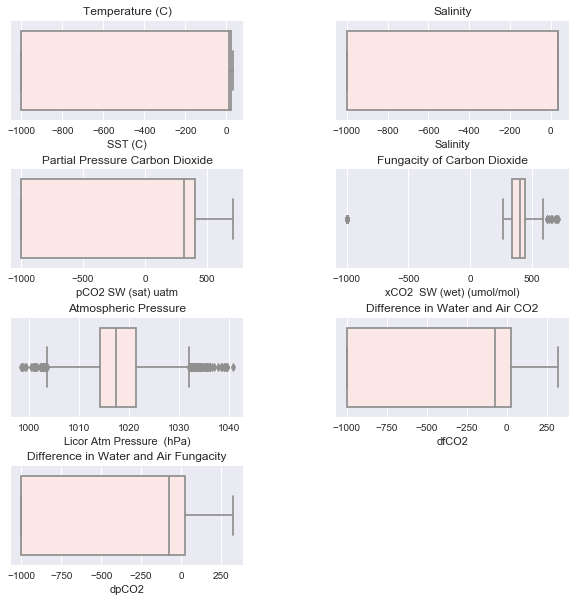

In [209]:
plt.style.use('seaborn')
fig, axis = plt.subplots(nrows = 4, ncols = 2)
fig.set_size_inches(10,10)
fig.subplots_adjust(wspace = 0.4, hspace = 0.5)

# plot 1
sns.boxplot(g_temp_c, color = 'mistyrose', ax = axis[0,0]).set_title('Temperature (C)')
# plot 2
sns.boxplot(g_sal, color = 'mistyrose', ax = axis[0,1]).set_title('Salinity')
# plot 3
sns.boxplot(g_pCO2, color = 'mistyrose', ax = axis[1,0]).set_title('Partial Pressure Carbon Dioxide')
# plot 4
sns.boxplot(xCO2, color = 'mistyrose', ax = axis[1,1]).set_title('Fungacity of Carbon Dioxide')
# plot 5
sns.boxplot(atmP, color = 'mistyrose', ax = axis[2,0]).set_title('Atmospheric Pressure')
# plot 6
sns.boxplot(dfCO2, color = 'mistyrose', ax = axis[2,1]).set_title('Difference in Water and Air CO2')
# plot 7
sns.boxplot(dpCO2, color = 'mistyrose', ax = axis[3,0]).set_title('Difference in Water and Air Fungacity')

ax = axis[3,1].set_visible(False)

There are some outliers in a few of the variables. I am struggling on finding a proper way to remove these outliers. I will continue to work towards properly removing these outliers. 

In [225]:
gray_clean.describe()

,xCO2,atmP,g_temp_c,g_sal,dfCO2,g_pCO2,dpCO2,temp_f
count,3293.000000,3293.000000,3293.000000,3131.000000,3293.000000,3275.000000,3293.000000,3293.000000
mean,388.293046,1018.608624,20.352086,35.296340,0.317492,383.499695,0.305588,68.633586
std,59.835209,5.612817,6.306139,0.689209,63.614521,54.897381,63.833202,11.351167
min,266.800000,998.500000,11.610000,33.190000,-126.600000,269.200000,-127.000000,52.900000
25%,340.500000,1014.900000,14.520000,34.840000,-52.500000,339.700000,-52.800000,58.130000
50%,395.900000,1018.100000,18.890000,35.420000,8.800000,390.100000,8.900000,65.990000
75%,429.300000,1022.200000,26.710000,35.870000,47.700000,422.400000,47.800000,80.080000
max,716.400000,1036.200000,30.990000,36.460000,321.500000,543.900000,322.700000,87.790000


In [226]:
gray_clean = gray_clean[gray_clean.g_temp_c != -999]
gray_clean = gray_clean[gray_clean.xCO2 != -999]
gray_clean = gray_clean[gray_clean.atmP != -999]
gray_clean = gray_clean[gray_clean.g_sal != -999]
gray_clean = gray_clean[gray_clean.dfCO2 != -999]
gray_clean = gray_clean[gray_clean.g_pCO2 != -999]
gray_clean = gray_clean[gray_clean.dpCO2 != -999]

In [227]:
gray_clean.describe()

,xCO2,atmP,g_temp_c,g_sal,dfCO2,g_pCO2,dpCO2,temp_f
count,3293.000000,3293.000000,3293.000000,3131.000000,3293.000000,3275.000000,3293.000000,3293.000000
mean,388.293046,1018.608624,20.352086,35.296340,0.317492,383.499695,0.305588,68.633586
std,59.835209,5.612817,6.306139,0.689209,63.614521,54.897381,63.833202,11.351167
min,266.800000,998.500000,11.610000,33.190000,-126.600000,269.200000,-127.000000,52.900000
25%,340.500000,1014.900000,14.520000,34.840000,-52.500000,339.700000,-52.800000,58.130000
50%,395.900000,1018.100000,18.890000,35.420000,8.800000,390.100000,8.900000,65.990000
75%,429.300000,1022.200000,26.710000,35.870000,47.700000,422.400000,47.800000,80.080000
max,716.400000,1036.200000,30.990000,36.460000,321.500000,543.900000,322.700000,87.790000


In [228]:
iqr1 = 429.3-340.5
iqr2 = 1022.2-1014.9
iqr3 = 26.71-14.52
iqr4 = 35.85-34.79
iqr5 = 47.7-(-52.5)
iqr6 = 422.7-340.0
iqr7 = 47.8-(-52.8)

In [229]:
lb1 = 340.5 -(1.5 * iqr1) 
ub1 = 429.3 +(1.5 * iqr1)
lb1,ub1

(207.29999999999998, 562.5)

In [230]:
gray_clean.xCO2 = gray_clean.xCO2[(gray_clean['xCO2'] >= 207.29) & (gray_clean['xCO2'] <= 562.5)]

In [231]:
lb2 = 1014.9 -(1.5 * iqr2) 
ub2 = 1022.2 +(1.5 * iqr2)
lb2,ub2

(1003.9499999999998, 1033.15)

In [232]:
gray_clean.atmP = gray_clean.atmP[(gray_clean['atmP'] >= 1003.95) & (gray_clean['atmP'] <= 1033.15)]

In [233]:
lb3 = 14.52 -(1.5 * iqr3) 
ub3 = 26.71 +(1.5 * iqr3)
lb3,ub3

(-3.765000000000004, 44.995000000000005)

In [234]:
gray_clean.g_temp_c = gray_clean.g_temp_c[(gray_clean['g_temp_c'] >= -3.76) & (gray_clean['g_temp_c'] <= 44.99)]

In [235]:
lb4 = 34.79 -(1.5 * iqr4) 
ub4 = 35.85 +(1.5 * iqr4)
lb4,ub4

(33.199999999999996, 37.440000000000005)

In [236]:
gray_clean.g_sal = gray_clean.g_sal[(gray_clean['g_sal'] >= 33.19) & (gray_clean['g_sal'] <= 37.44)]

In [237]:
lb5 = (-52.5) -(1.5 * iqr5) 
ub5 = 47.7 +(1.5 * iqr5)
lb5,ub5

(-202.8, 198.0)

In [238]:
gray_clean.dfCO2 = gray_clean.dfCO2[(gray_clean['dfCO2'] >= -202.8) & (gray_clean['dfCO2'] <= 198.0)]

In [239]:
lb6 = 340.0 -(1.5 * iqr6) 
ub6 = 422.7 +(1.5 * iqr6)
lb6,ub6

(215.95000000000002, 546.75)

In [240]:
gray_clean.g_pCO2 = gray_clean.g_pCO2[(gray_clean['g_pCO2'] >= 215.95) & (gray_clean['g_pCO2'] <= 546.75)]

In [241]:
lb7 = (-52.8) -(1.5 * iqr7) 
ub7 = 47.8 +(1.5 * iqr7)
lb7,ub7

(-203.7, 198.7)

In [242]:
gray_clean.dpCO2 = gray_clean.dpCO2[(gray_clean['dpCO2'] >= -203.7) & (gray_clean['dpCO2'] <= 198.7)]

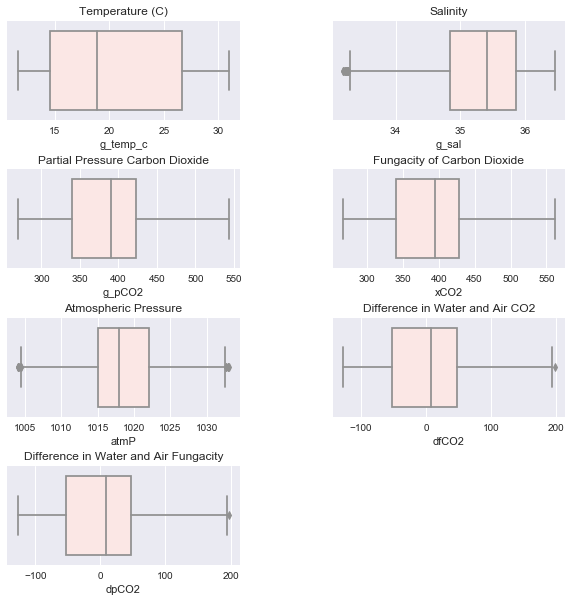

In [243]:
plt.style.use('seaborn')
fig, axis = plt.subplots(nrows = 4, ncols = 2)
fig.set_size_inches(10,10)
fig.subplots_adjust(wspace = 0.4, hspace = 0.5)

# plot 1
sns.boxplot(gray_clean.g_temp_c, color = 'mistyrose', ax = axis[0,0]).set_title('Temperature (C)')
# plot 2
sns.boxplot(gray_clean.g_sal, color = 'mistyrose', ax = axis[0,1]).set_title('Salinity')
# plot 3
sns.boxplot(gray_clean.g_pCO2, color = 'mistyrose', ax = axis[1,0]).set_title('Partial Pressure Carbon Dioxide')
# plot 4
sns.boxplot(gray_clean.xCO2, color = 'mistyrose', ax = axis[1,1]).set_title('Fungacity of Carbon Dioxide')
# plot 5
sns.boxplot(gray_clean.atmP, color = 'mistyrose', ax = axis[2,0]).set_title('Atmospheric Pressure')
# plot 6
sns.boxplot(gray_clean.dfCO2, color = 'mistyrose', ax = axis[2,1]).set_title('Difference in Water and Air CO2')
# plot 7
sns.boxplot(gray_clean.dpCO2, color = 'mistyrose', ax = axis[3,0]).set_title('Difference in Water and Air Fungacity')

ax = axis[3,1].set_visible(False)

# API Dataset

In [104]:
url = "https://cmr.earthdata.nasa.gov/opensearch/granules/descriptor_document.xml?clientId=eed-edsc-prod-serverless-client&shortName=CMS_Monthly_CO2_Gulf_of_Mexico_1668&versionId=1&dataCenter=ORNL_DAAC"
r = requests.get(url)
print("CONTENT", r.content)

CONTENT b'<?xml version="1.0"?>\n<os:OpenSearchDescription\n\txmlns:os="http://a9.com/-/spec/opensearch/1.1/"\n\txmlns:echo="https://cmr.earthdata.nasa.gov/search/site/docs/search/api.html#atom"\n\txmlns:geo="http://a9.com/-/opensearch/extensions/geo/1.0/"\n\txmlns:time="http://a9.com/-/opensearch/extensions/time/1.0/"\n\txmlns:esipdiscovery="http://commons.esipfed.org/ns/discovery/1.2/" esipdiscovery:version="1.2"\n\txmlns:params="http://a9.com/-/spec/opensearch/extensions/parameters/1.0/"\n\txmlns:referrer="http://www.opensearch.org/Specifications/OpenSearch/Extensions/Referrer/1.0"\n\txmlns:eo="http://a9.com/-/opensearch/extensions/eo/1.0/"\n\txmlns:atom="http://www.w3.org/2005/Atom">\n\t<os:ShortName>CMR Granules</os:ShortName>\n\t<os:Description>NASA CMR Granule search using geo, time and parameter extensions</os:Description>\n\t<os:Tags>CMR NASA CWIC CEOS-OS-BP-V1.1/L3 ESIP OGC granule pageOffset=1 indexOffset=0</os:Tags>\n\t<os:Contact>echodev@echo.nasa.gov</os:Contact>\n\t<os:U

need: template="https://cmr.earthdata.nasa.gov/opensearch/granules.html?datasetId={echo:datasetId?}&amp;shortName=CMS_Monthly_CO2_Gulf_of_Mexico_1668&amp;versionId=1&amp;dataCenter=ORNL_DAAC&amp;boundingBox={geo:box?}&amp;geometry={geo:geometry?}&amp;placeName={geo:name?}&amp;startTime={time:start?}&amp;endTime={time:end?}&amp;cursor={os:startPage?}&amp;numberOfResults={os:count?}&amp;offset={os:startIndex?}&amp;uid={geo:uid?}&amp;parentIdentifier={eo:parentIdentifier?}&amp;clientId=eed-edsc-prod-serverless-client"

In [379]:
nc = netCDF4.Dataset("pco2_co2_flux.nc")
nc

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Conventions: CF-1.6
    title: Monthly Satellite-Estimated pCO2 and air-sea flux of CO2 for Northern Gulf of Mexico, 2006-2010
    institution: Oak Ridge National Laboratory (ORNL) Distributed Active Archive Center (DAAC)
    references: Lohrenz, S.E., Cai, W.J., Chakraborty, S., Huang, W.J., Guo, X., He, R., Xue, Z., Fennel, K., Howden, S. and Tian, H. 2018. Satellite estimation of coastal pCO2 and air-sea flux of carbon dioxide in the northern Gulf of Mexico. Remote Sensing of Environment, 207:71-83. doi.org/10.1016/j.rse.2017.12.039
    source: Version 1, funding from NASA's Carbon Monitoring System
    dimensions(sizes): time(60), nv(2), lon(960), lat(672)
    variables(dimensions): float64 time(time), float64 time_bnds(time, nv), float64 CO2_flux(time, lon, lat), float64 PCO2(time, lon, lat), float64 lat(lat), float64 lon(lon), float64 crs()
    groups: 

In [380]:
for i in nc.variables:
    print(i, nc.variables[i].units, nc.variables[i].shape)

time days since 2006-01-01 (60,)
time_bnds days since 2006-01-01 (60, 2)
CO2_flux mmol m-2 s-1 (60, 960, 672)
PCO2 Pa (60, 960, 672)
lat degrees_north (672,)
lon degrees_east (960,)


AttributeError: NetCDF: Attribute not found

In [384]:
date = nc.variables["time"][:]
date_bnd = nc.variables["time_bnds"][:]
CO2_flux = nc.variables["CO2_flux"][:]
pCO2 = nc.variables["PCO2"][:]
lat = nc.variables["lat"][:]
lon = nc.variables["lon"][:]

In [382]:
date

masked_array(data=[  15.5,   45. ,   74.5,  105. ,  135.5,  166. ,  196.5,
                    227.5,  258. ,  288.5,  319. ,  349.5,  380.5,  410. ,
                    439.5,  470. ,  500.5,  531. ,  561.5,  592.5,  623. ,
                    653.5,  684. ,  714.5,  745.5,  775.5,  805.5,  836. ,
                    866.5,  897. ,  927.5,  958.5,  989. , 1019.5, 1050. ,
                   1080.5, 1111.5, 1141. , 1170.5, 1201. , 1231.5, 1262. ,
                   1292.5, 1323.5, 1354. , 1384.5, 1415. , 1445.5, 1476.5,
                   1506. , 1535.5, 1566. , 1596.5, 1627. , 1657.5, 1688.5,
                   1719. , 1749.5, 1780. , 1810.5],
             mask=False,
       fill_value=1e+20)

In [386]:
data = {date, CO2_flux, pCO2, lat, lon}
api = pd.DataFrame(data, columns = ("Date", "CO2_flux", "pCO2", "lat", "lon"))

TypeError: unhashable type: 'MaskedArray'

# Merging and Visualizations

In [318]:
coral_clean.head()

,treat,date,species,calc_rate,c_temp_c,c_sal,pH,CO2,c_pCO2,HCO3,temp_f
0,0,2007-09-12,Siderastrea radians (coral),5.51,29.80,33.52,8.072,8.97,353.0,1625,85.640
1,0,2007-09-12,Siderastrea radians (coral),5.55,30.32,33.39,8.089,8.48,337.0,1609,86.576
2,0,2007-09-12,Siderastrea radians (coral),6.50,30.32,33.39,8.089,8.48,337.0,1609,86.576
3,0,2007-09-12,Siderastrea radians (coral),4.51,29.85,33.52,8.072,8.96,353.0,1625,85.730
5,0,2007-09-12,Solenastrea hyades (coral),1.56,30.32,33.39,8.089,8.48,337.0,1609,86.576


In [319]:
gray_clean.head()

,date,time,xCO2,atmP,g_temp_c,g_sal,dfCO2,g_pCO2,dpCO2,temp_f
0,2007-06-26,21:13:00,396.5,1023.1,27.89,34.85,18.3,390.9,18.4,82.20
1,2007-06-26,21:43:00,396.3,1022.8,27.83,34.87,17.9,390.7,18.0,82.10
2,2007-06-26,22:13:00,390.8,1022.7,27.69,34.85,12.7,385.6,12.8,81.84
3,2007-06-26,22:43:00,398.1,1022.7,27.80,34.89,19.6,392.7,19.7,82.03
4,2007-06-26,23:13:00,398.1,1022.6,27.76,34.90,19.5,393.0,19.6,81.96


In [320]:
cg = pd.merge(coral_clean, gray_clean, on = "date")
cg

,treat,date,species,calc_rate,c_temp_c,c_sal,pH,CO2,c_pCO2,HCO3,temp_f_x,time,xCO2,atmP,g_temp_c,g_sal,dfCO2,g_pCO2,dpCO2,temp_f_y
0,0,2007-09-12,Siderastrea radians (coral),5.51,29.80,33.520,8.072,8.97,353.0,1625,85.640,0:16:00,435.2,1014.3,28.72,35.18,61.4,426.1,61.6,83.70
1,0,2007-09-12,Siderastrea radians (coral),5.51,29.80,33.520,8.072,8.97,353.0,1625,85.640,3:16:00,444.8,1015.3,28.73,35.21,69.8,436.1,70.1,83.72
2,0,2007-09-12,Siderastrea radians (coral),5.51,29.80,33.520,8.072,8.97,353.0,1625,85.640,6:16:00,430.4,1015.6,28.72,35.86,48.1,421.9,48.2,83.70
3,0,2007-09-12,Siderastrea radians (coral),5.51,29.80,33.520,8.072,8.97,353.0,1625,85.640,9:16:00,420.7,1015.2,28.72,35.97,40.9,412.3,41.0,83.70
4,0,2007-09-12,Siderastrea radians (coral),5.51,29.80,33.520,8.072,8.97,353.0,1625,85.640,23:16:00,381.8,1015.5,28.96,35.88,8.7,374.2,8.7,84.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,1,2009-03-31,Solenastrea hyades (coral),9.66,26.41,37.343,7.926,15.16,562.0,1900,79.538,9:17:00,414.7,1016.8,16.64,33.89,17.8,412.1,17.9,61.96
550,1,2009-03-31,Solenastrea hyades (coral),9.66,26.41,37.343,7.926,15.16,562.0,1900,79.538,12:17:00,407.3,1018.6,16.26,34.07,8.7,405.7,8.8,61.26
551,1,2009-03-31,Solenastrea hyades (coral),9.66,26.41,37.343,7.926,15.16,562.0,1900,79.538,15:17:00,405.3,1019.0,16.24,34.50,10.6,404.0,10.7,61.23
552,1,2009-03-31,Solenastrea hyades (coral),9.66,26.41,37.343,7.926,15.16,562.0,1900,79.538,18:17:00,405.1,1017.7,16.32,34.58,11.0,403.5,11.0,61.38


In [321]:
cg.isnull().sum()

treat         0
date          0
species       0
calc_rate    24
c_temp_c      0
c_sal         0
pH            0
CO2           0
c_pCO2       53
HCO3          0
temp_f_x      0
time          0
xCO2          0
atmP          0
g_temp_c      0
g_sal         0
dfCO2         0
g_pCO2        0
dpCO2         0
temp_f_y      0
dtype: int64

In [323]:
cg.dropna()

,treat,date,species,calc_rate,c_temp_c,c_sal,pH,CO2,c_pCO2,HCO3,temp_f_x,time,xCO2,atmP,g_temp_c,g_sal,dfCO2,g_pCO2,dpCO2,temp_f_y
0,0,2007-09-12,Siderastrea radians (coral),5.51,29.80,33.520,8.072,8.97,353.0,1625,85.640,0:16:00,435.2,1014.3,28.72,35.18,61.4,426.1,61.6,83.70
1,0,2007-09-12,Siderastrea radians (coral),5.51,29.80,33.520,8.072,8.97,353.0,1625,85.640,3:16:00,444.8,1015.3,28.73,35.21,69.8,436.1,70.1,83.72
2,0,2007-09-12,Siderastrea radians (coral),5.51,29.80,33.520,8.072,8.97,353.0,1625,85.640,6:16:00,430.4,1015.6,28.72,35.86,48.1,421.9,48.2,83.70
3,0,2007-09-12,Siderastrea radians (coral),5.51,29.80,33.520,8.072,8.97,353.0,1625,85.640,9:16:00,420.7,1015.2,28.72,35.97,40.9,412.3,41.0,83.70
4,0,2007-09-12,Siderastrea radians (coral),5.51,29.80,33.520,8.072,8.97,353.0,1625,85.640,23:16:00,381.8,1015.5,28.96,35.88,8.7,374.2,8.7,84.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,1,2009-03-31,Solenastrea hyades (coral),9.66,26.41,37.343,7.926,15.16,562.0,1900,79.538,9:17:00,414.7,1016.8,16.64,33.89,17.8,412.1,17.9,61.96
550,1,2009-03-31,Solenastrea hyades (coral),9.66,26.41,37.343,7.926,15.16,562.0,1900,79.538,12:17:00,407.3,1018.6,16.26,34.07,8.7,405.7,8.8,61.26
551,1,2009-03-31,Solenastrea hyades (coral),9.66,26.41,37.343,7.926,15.16,562.0,1900,79.538,15:17:00,405.3,1019.0,16.24,34.50,10.6,404.0,10.7,61.23
552,1,2009-03-31,Solenastrea hyades (coral),9.66,26.41,37.343,7.926,15.16,562.0,1900,79.538,18:17:00,405.1,1017.7,16.32,34.58,11.0,403.5,11.0,61.38


In [325]:
cg_clean = cg.rename(columns={"date":"date", "treat":"treat", "speceis":"species", "calc_rate":"calc_rate", "atmP":"atmP", "c_temp_c":"coral_tempc", "g_temp_c":"gray_tempc", "c_sal":"coral_sal", "g_sal":"gray_sal", "pH":"pH", "CO2":"CO2", "c_pCO2":"coral_pCO2", "g_pCO2":"gray_pCO2"})
cg_clean

,treat,date,species,calc_rate,coral_tempc,coral_sal,pH,CO2,coral_pCO2,HCO3,temp_f_x,time,xCO2,atmP,gray_tempc,gray_sal,dfCO2,gray_pCO2,dpCO2,temp_f_y
0,0,2007-09-12,Siderastrea radians (coral),5.51,29.80,33.520,8.072,8.97,353.0,1625,85.640,0:16:00,435.2,1014.3,28.72,35.18,61.4,426.1,61.6,83.70
1,0,2007-09-12,Siderastrea radians (coral),5.51,29.80,33.520,8.072,8.97,353.0,1625,85.640,3:16:00,444.8,1015.3,28.73,35.21,69.8,436.1,70.1,83.72
2,0,2007-09-12,Siderastrea radians (coral),5.51,29.80,33.520,8.072,8.97,353.0,1625,85.640,6:16:00,430.4,1015.6,28.72,35.86,48.1,421.9,48.2,83.70
3,0,2007-09-12,Siderastrea radians (coral),5.51,29.80,33.520,8.072,8.97,353.0,1625,85.640,9:16:00,420.7,1015.2,28.72,35.97,40.9,412.3,41.0,83.70
4,0,2007-09-12,Siderastrea radians (coral),5.51,29.80,33.520,8.072,8.97,353.0,1625,85.640,23:16:00,381.8,1015.5,28.96,35.88,8.7,374.2,8.7,84.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,1,2009-03-31,Solenastrea hyades (coral),9.66,26.41,37.343,7.926,15.16,562.0,1900,79.538,9:17:00,414.7,1016.8,16.64,33.89,17.8,412.1,17.9,61.96
550,1,2009-03-31,Solenastrea hyades (coral),9.66,26.41,37.343,7.926,15.16,562.0,1900,79.538,12:17:00,407.3,1018.6,16.26,34.07,8.7,405.7,8.8,61.26
551,1,2009-03-31,Solenastrea hyades (coral),9.66,26.41,37.343,7.926,15.16,562.0,1900,79.538,15:17:00,405.3,1019.0,16.24,34.50,10.6,404.0,10.7,61.23
552,1,2009-03-31,Solenastrea hyades (coral),9.66,26.41,37.343,7.926,15.16,562.0,1900,79.538,18:17:00,405.1,1017.7,16.32,34.58,11.0,403.5,11.0,61.38


In [326]:
pwd

"C:\\Users\\datre\\OneDrive\\Documents\\Graduate School\\Summer '20"

In [327]:
conn = sqlite3.connect("term.db")
c = conn.cursor()

In [328]:
cg_clean.to_sql("merge", conn, if_exists = "replace", index = True)
pd.read_sql("select * from merge", conn)

,index,treat,date,species,calc_rate,coral_tempc,coral_sal,pH,CO2,coral_pCO2,...,temp_f_x,time,xCO2,atmP,gray_tempc,gray_sal,dfCO2,gray_pCO2,dpCO2,temp_f_y
0,0,0,2007-09-12,Siderastrea radians (coral),5.51,29.80,33.520,8.072,8.97,353.0,...,85.640,0:16:00,435.2,1014.3,28.72,35.18,61.4,426.1,61.6,83.70
1,1,0,2007-09-12,Siderastrea radians (coral),5.51,29.80,33.520,8.072,8.97,353.0,...,85.640,3:16:00,444.8,1015.3,28.73,35.21,69.8,436.1,70.1,83.72
2,2,0,2007-09-12,Siderastrea radians (coral),5.51,29.80,33.520,8.072,8.97,353.0,...,85.640,6:16:00,430.4,1015.6,28.72,35.86,48.1,421.9,48.2,83.70
3,3,0,2007-09-12,Siderastrea radians (coral),5.51,29.80,33.520,8.072,8.97,353.0,...,85.640,9:16:00,420.7,1015.2,28.72,35.97,40.9,412.3,41.0,83.70
4,4,0,2007-09-12,Siderastrea radians (coral),5.51,29.80,33.520,8.072,8.97,353.0,...,85.640,23:16:00,381.8,1015.5,28.96,35.88,8.7,374.2,8.7,84.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,549,1,2009-03-31,Solenastrea hyades (coral),9.66,26.41,37.343,7.926,15.16,562.0,...,79.538,9:17:00,414.7,1016.8,16.64,33.89,17.8,412.1,17.9,61.96
550,550,1,2009-03-31,Solenastrea hyades (coral),9.66,26.41,37.343,7.926,15.16,562.0,...,79.538,12:17:00,407.3,1018.6,16.26,34.07,8.7,405.7,8.8,61.26
551,551,1,2009-03-31,Solenastrea hyades (coral),9.66,26.41,37.343,7.926,15.16,562.0,...,79.538,15:17:00,405.3,1019.0,16.24,34.50,10.6,404.0,10.7,61.23
552,552,1,2009-03-31,Solenastrea hyades (coral),9.66,26.41,37.343,7.926,15.16,562.0,...,79.538,18:17:00,405.1,1017.7,16.32,34.58,11.0,403.5,11.0,61.38


In [329]:
c.close()
conn.close()

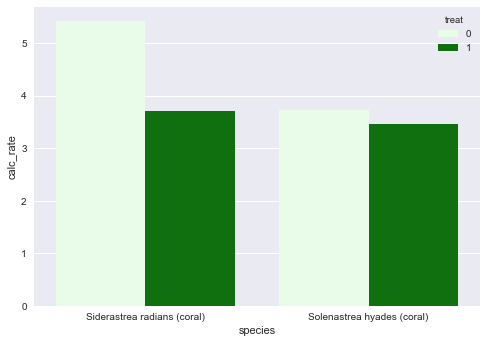

In [330]:
g1 = sns.barplot(x = cg_clean.species, y = cg_clean.calc_rate, hue = cg_clean.treat, color = "green", ci = False)

The high CO2 treatement (treatment 1) resulted in both coral species to decrease in their calcification rate.

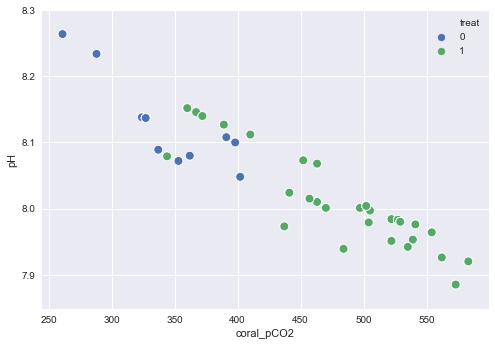

In [342]:
sns.scatterplot(x = cg_clean.coral_pCO2, y = cg_clean.pH, hue = cg_clean.treat, s = 77)

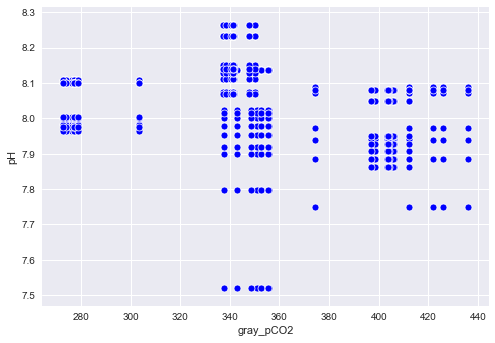

In [332]:
sns.scatterplot(x = cg_clean.gray_pCO2, y = cg_clean.pH, color = 'blue')

When comparing the pH and partial pressure at each location, the csv is located in Florida Bay, the website is Grays Reef, there is a gradual declide as the partial pressure increases at Florida Bay, the pH decreases. When comparing to data from Grays Reef, it is harder to tell a pattern. However, in the chunk of data between 375 and 440, the pH is generally lower by a slight amount.

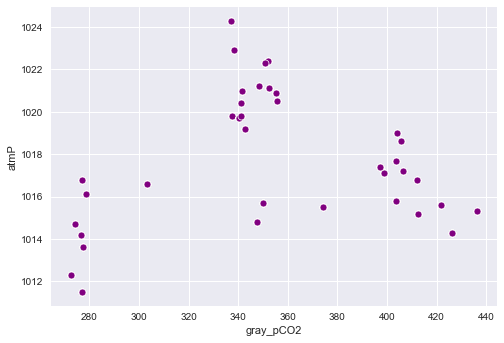

In [350]:
sns.scatterplot(x = cg_clean.gray_pCO2, y = cg_clean.atmP, color = 'purple')

Pressure 4 ft above sea level tends to be lower when the partial pressure of carbon dioxide is either high or low. Mid range partial pressures generally have a higher atmospheric pressure above them.

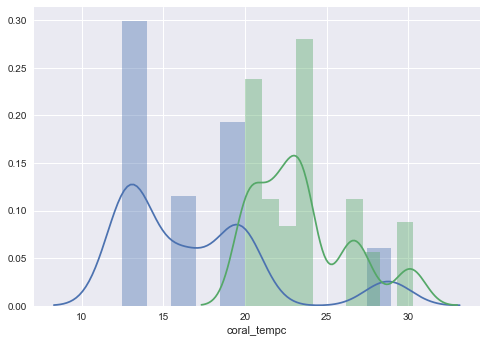

In [362]:
sns.distplot(cg_clean.gray_tempc, label = "Grays Reef")
sns.distplot(cg_clean.coral_tempc, label = "Florida Bay")

Overall the temperatures of Florida Bay are higher than Grays Reef. 

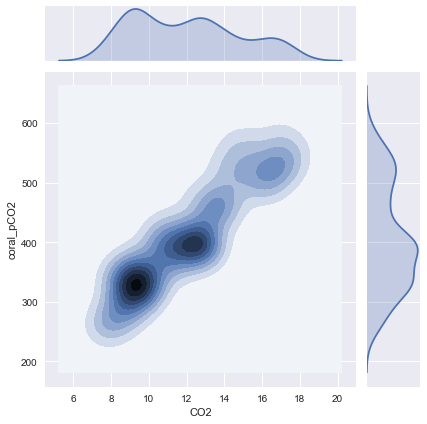

In [369]:
sns.jointplot(cg_clean.CO2, cg_clean.coral_pCO2, kind='kde')

There is a positive relationship between the amount of carbon dioxide in the water and the partial pressure of the carbon dioxide.

# Summary

This project proved to be a challenge for me. The types of data in the Marine Science realm typically come from flat data sources that are published with academic journals or on websites such as NOAA. There is plenty of marine data available from ships, buoys, experiments performed at sea, but again, mostly stored in these flat file sources. The first week was simple, using the csv and editing the data in the way it needed to be. It was a fairly clean dataset as it was used in a published paper. 

The second week was more difficult. I looked through Wikipedia and numerous other websites but there were no tables that simply existed on the webpage for me to scrap. I decided to scrape a csv file off of a website, downloading it into my folder for this semester and then accessing as I would a normal csv. Scraping it off the website took evaluating the code on the webpage itself to find the different patterns in how the files were stored on the webpage. Then, once I found the files I required I retrieved those files from the webpage. This dataset was more messy and required more cleaning to make each of the variables act more normally distributed with less outliers. I used a method of calculating the lower and upper bounds of each variable and choosing values within those bounds. Neither dataset had that many null values so it didn’t impact the number of rows very much.

The API was most difficult and I never did find out how to properly access data from it. Again, I found a scientific paper that had data of interest but could not figure out how to download and read it into python. The data format ended up being a .nc format, one that I researched and watched many videos on but was not able to unmask the values and put them into a dataset. 

With the concern of time, I moved on to merging the two datasets I had. I merged them using the pd.merge command, merging on the column date. The other types of joins I attempted had many null values. From there, I created a table in sqlite and used the pd.to_sql to enter the data within my dataframe into the sql table. I then created the five visualizations. The visualizations comparing two variables of one dataset yielded interesting results. With a higher concentration of carbon dioxide, the rate at which the coral could produce calcium carbonate decreased. Also, with a higher partial pressure of carbon dioxide, the pH of the water decreased, meaning more acidic. As a result, more acidic water with higher concentrations of carbon dioxide could cause coral to grown slower. The causation was not proven, but it is possible. There is an odd relationship between atmospheric pressure and partial pressure of carbon dioxide, with higher atmospheric pressure in the mid range of carbon dioxide pressure. The distribution of temperatures at Grays Reef were generally lower than that in Florida Bay and the amount of carbon dioxide has a strong relationship with the partial pressure of carbon dioxide.


Sources:

CSV - 
    
    Okazaki, R., Swart, P. K., & Langdon, C. (2013, May 27). Stress-tolerant corals of Florida Bay are vulnerable to ocean acidification. Retrieved from https://doi.pangaea.de/10.1594/PANGAEA.833005
    
Information on Website source - https://www.ncei.noaa.gov/data/oceans/ncei/ocads/metadata/0109904.html  

    Sutton, Adrienne J.; Sabine, Christopher L.; Cai, Wei-Jun; Noakes, Scott; Musielewicz, Sylvia; Maenner Jones, Stacy; Dietrich, Colin;  Bott, Randy; Osborne, John (2013). High-resolution ocean and atmosphere pCO2 time-series measurements from mooring GraysRf_81W_31N in the Gray's Reef National Marine Sanctuary and North Atlantic Ocean (NCEI Accession 0109904). [GraysRf_81W_31N_Jun2007_Jun2008.csv and GraysRf_81W_31N_Jun2008_May2009.csv]. NOAA National Centers for Environmental Information. Dataset. https://doi.org/10.3334/cdiac/otg.tsm_graysrf_81w_31n. Accessed [July/9/2020]